# 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# 2. Loading the Data

In [2]:
# Loading dataset
df = pd.read_csv("/content/HeartDiseaseTrain-Test.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


# 3. Clean Dataset (Encoding Categorical Data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [5]:
# Encoding the categorical columns
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   int64  
 2   chest_pain_type                1025 non-null   int64  
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   int64  
 6   rest_ecg                       1025 non-null   int64  
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   int64  
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   int64  
 11  vessels_colored_by_flourosopy  1025 non-null   int64  
 12  thalassemia                    1025 non-null   i

# 4. Performing EDA

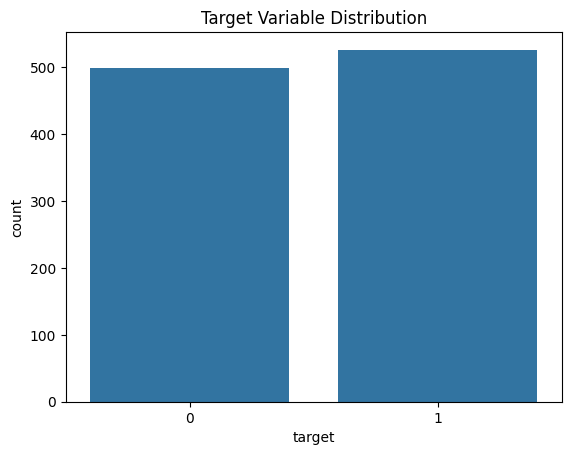

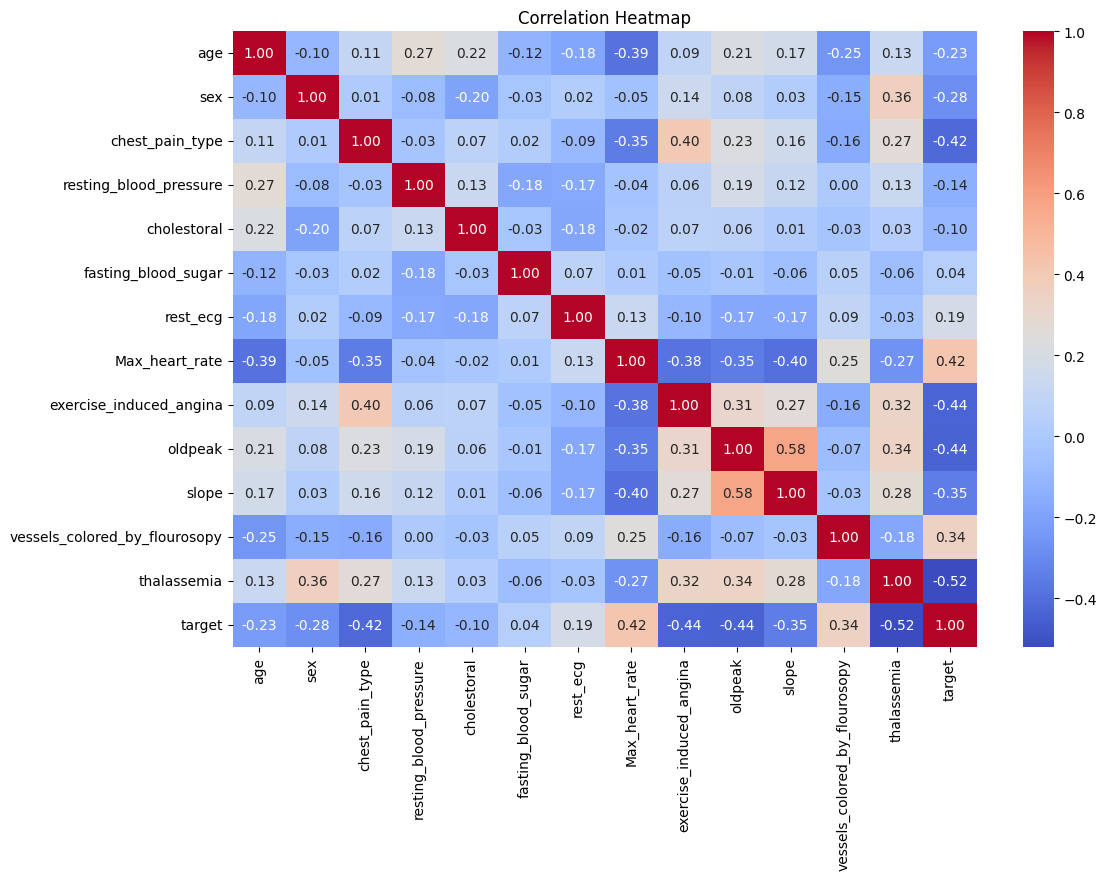

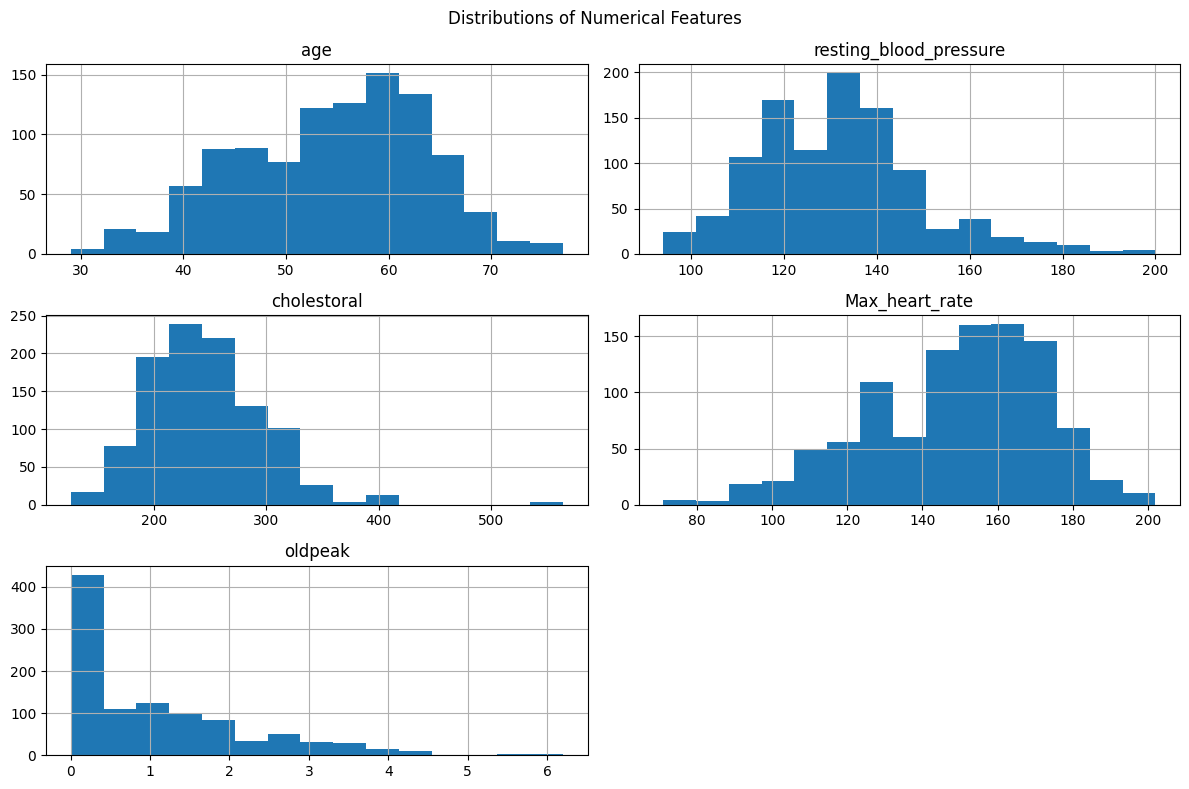

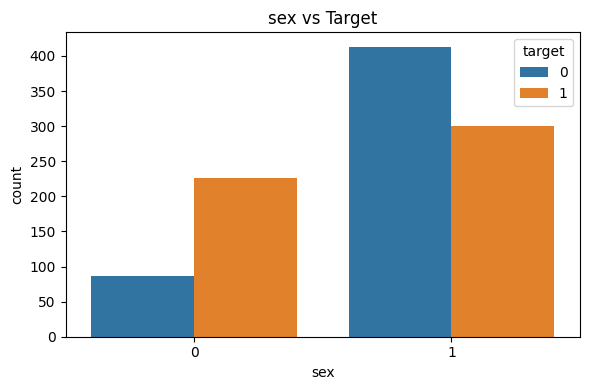

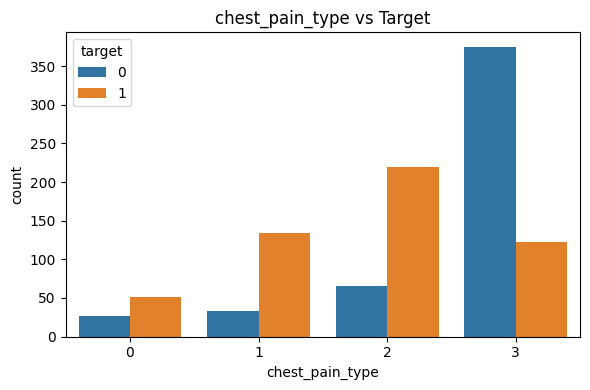

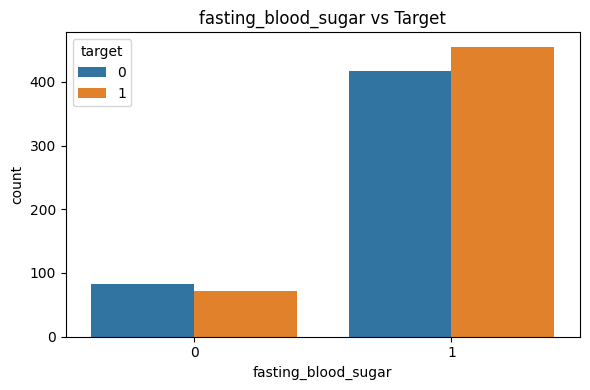

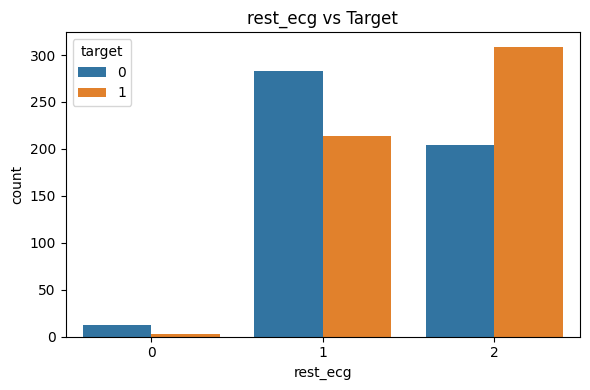

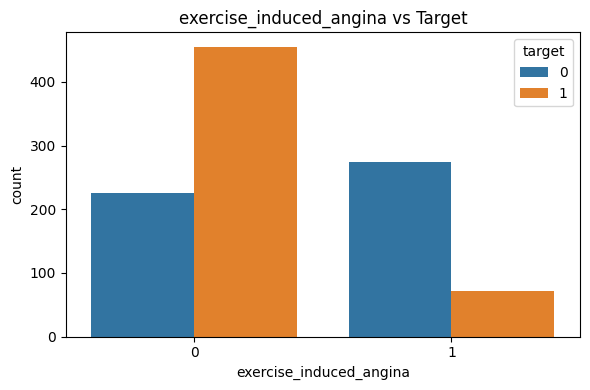

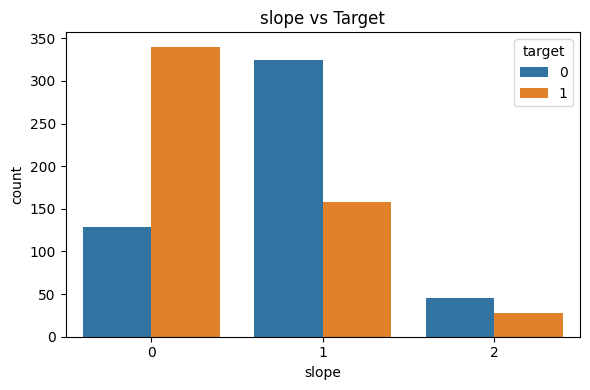

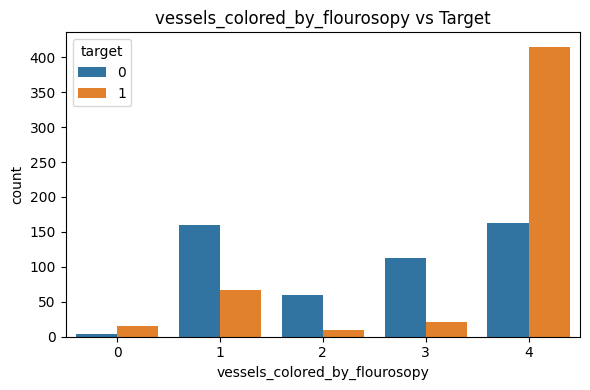

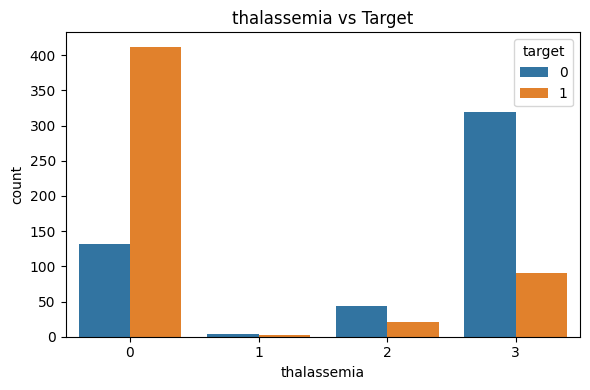

In [6]:
# Target distribution
sns.countplot(x='target', data=df_encoded)
plt.title('Target Variable Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Histograms for numeric columns
numeric_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
df_encoded[numeric_cols].hist(bins=15, figsize=(12, 8))
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()

# Categorical features vs target
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
                    'rest_ecg', 'exercise_induced_angina', 'slope',
                    'vessels_colored_by_flourosopy', 'thalassemia']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='target', data=df_encoded)
    plt.title(f'{col} vs Target')
    plt.tight_layout()
    plt.show()

# 5. Training Both Models

In [7]:
# Feature/target split
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 6. Evaluating the Models

Logistic Regression Accuracy: 0.7951219512195122
Decision Tree Accuracy: 0.9853658536585366
Logistic Regression Confusion Matrix:
 [[76 26]
 [16 87]]
Decision Tree Confusion Matrix:
 [[102   0]
 [  3 100]]


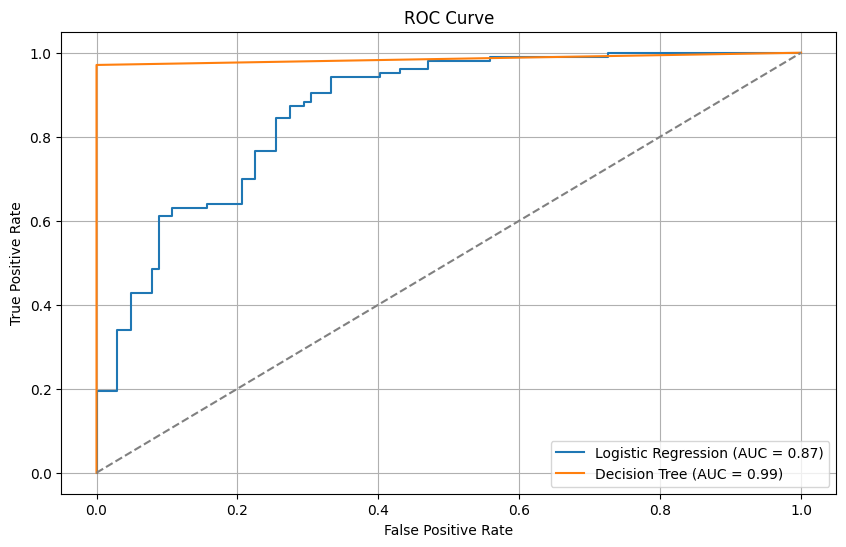

In [8]:
# Predictions from both models
lr_preds = lr.predict(X_test)
dt_preds = dt.predict(X_test)

# Accuracy of the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

# Confusion matrices of the models
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

# ROC curves
lr_probs = lr.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, lr_probs)))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, dt_probs)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 7. Feature Importance

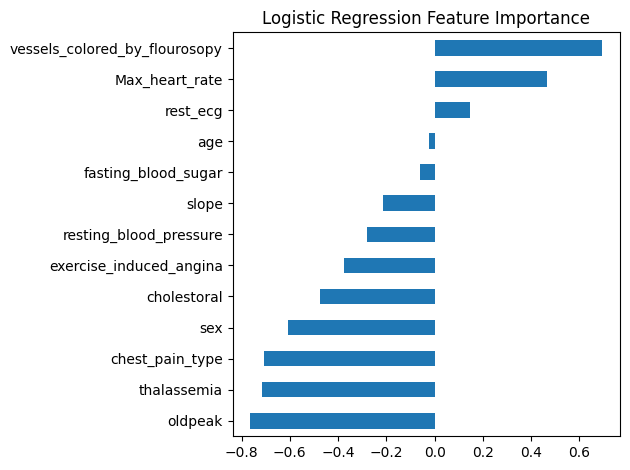

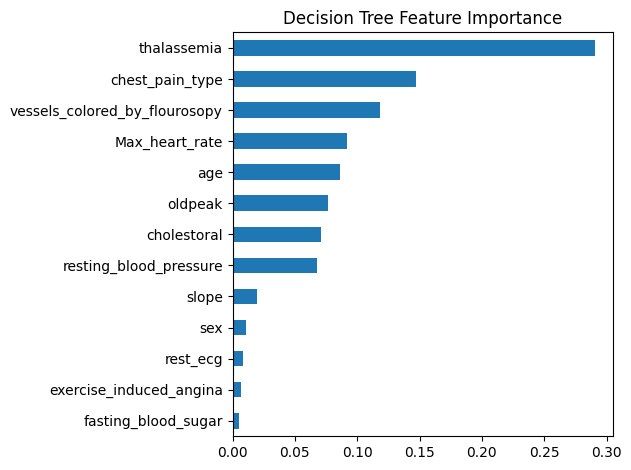

In [9]:
# Logistic Regression Coefficients
coeffs = pd.Series(lr.coef_[0], index=X.columns)
coeffs.sort_values().plot(kind='barh', title='Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

# Decision Tree Feature Importances
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Decision Tree Feature Importance')
plt.tight_layout()
plt.show()
